<a href="https://colab.research.google.com/github/WoogiWooks/DLCV_New/blob/main/3_RCNN_%EA%B3%84%EC%97%B4(RCNN%2C_SPP_Net%2C_Fast_RCNN%2C_Faster_RCNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RCNN**

* Region Proposal 방식에 기반한 Object Detection
* Selective Search를 통해 추출된 2000개의 영역 이미지를 CNN 네트워크에 넣어 학습
* FC Layer 때문에 Proposal된 다른 크기의 영역 이미지를 사이즈 통일해야해서 원본과 다른 특성을 지니게 됨 (영역 이미지의 Crop/Warp)
* 2000개에 대한 학습이 이루어져야 하므로 시간이 매우 오래걸림
* 아키텍처와 학습 프로세스가 매우 복잡
* Softmax 대신 SVM을 적용하는 것이 특징

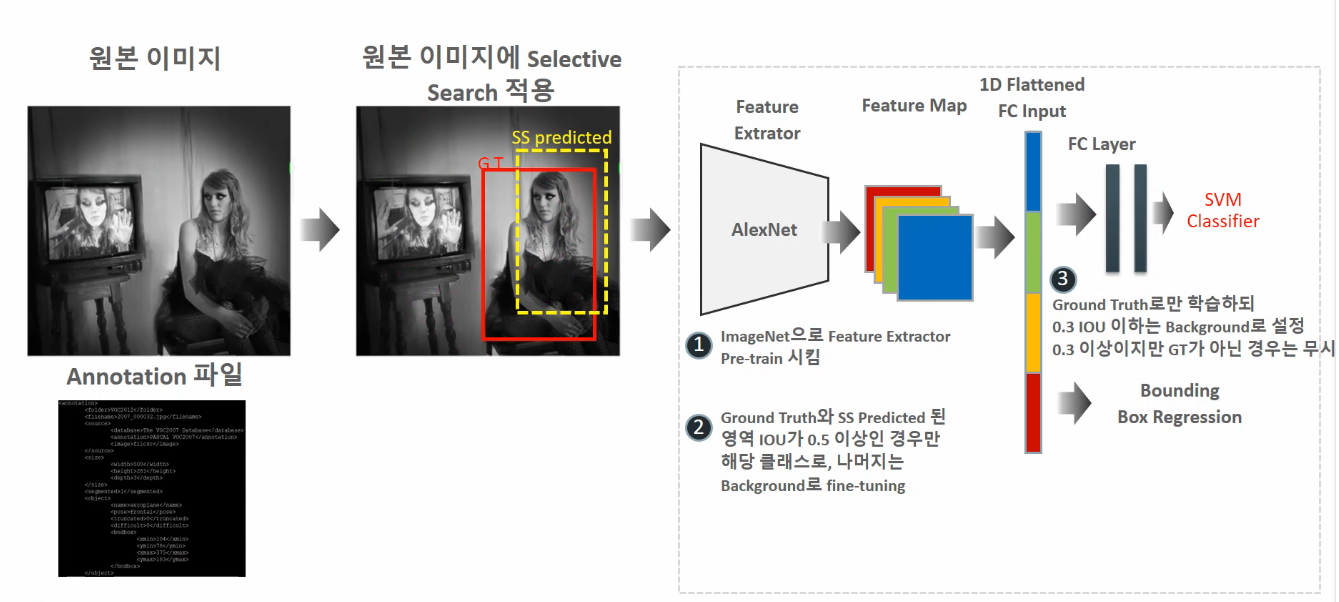

# **SPP Net**
* 원본 이미지의 Feature Map에 Selective Search로 나온 Region 2000개를 맵핑시킴
  * 원본 이미지가 Feature Map으로 줄어든 만큼, Region도 줄여서 맵핑



* 허나, 맵핑된 Region들의 크기가 다르기에 동일한 크기의 FC Layer가 생성되지 않음


* Spatial Pyramid Pooling 방법을 써서 크기를 동일하게 맞춰줌 (Conv Layer와 FC Layer 사이 SPP Layer 생성)
  * Image Feature가 손상될 수 있는 단순 Resize (Crop/Warp)가 아님
  * Feature Map에서 Bag of Visual Word 형식으로 정보를 뽑아내 분류하도록 함
  * 이때 Feature Map을 여러분면으로 나누어 정보를 뽑아내 Vector를 만듦
  * 이는 Feature Map의 크기가 달라도 동일한 만큼의 Vector가 생성됨
  * 아래 예시는 3개의 정보를 뽑아냈지만, 실제로는 Pooling으로 분면별 하나의 정보 뽑아냄


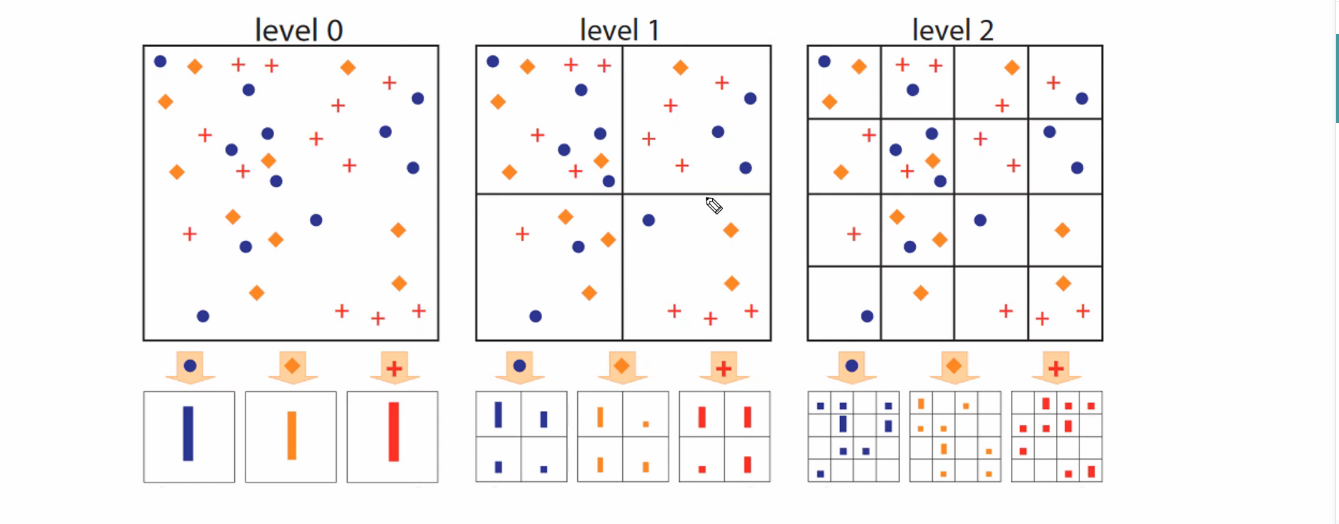


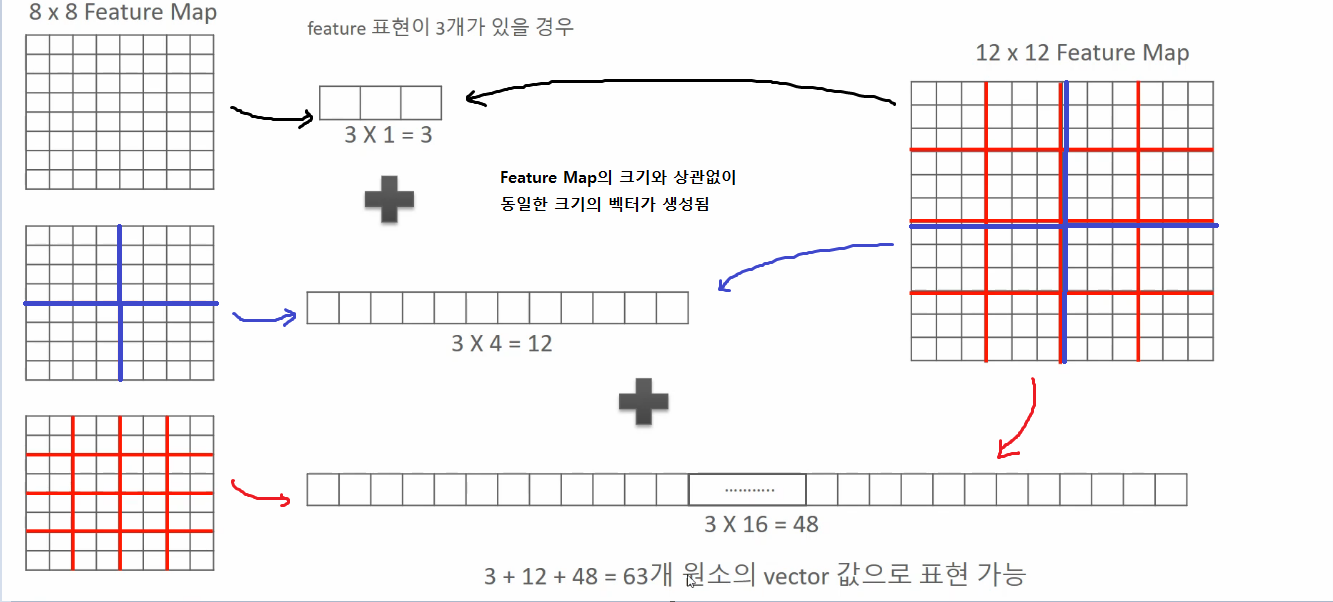

# **Fast RCNN**
* SPP Layer를 ROI Pooling Layer로 변경
  * Feature Map에 맵핑된 영역을 Max Pooling을 통해 크기를 통일시킴
  * Max Pooling이 안맞아 떨어지면 resize를 시켜서 Pooling 진행함
* SVM을 Softmax로 변환 (Classification이 DL Network 안에 들어오게 됨)
* Multi-task loss 함수를 사용하여 Classification과 Regression을 함께 최적화
* 즉, Classification과 Regression 모두 역전파를 통해 학습이 가능해짐

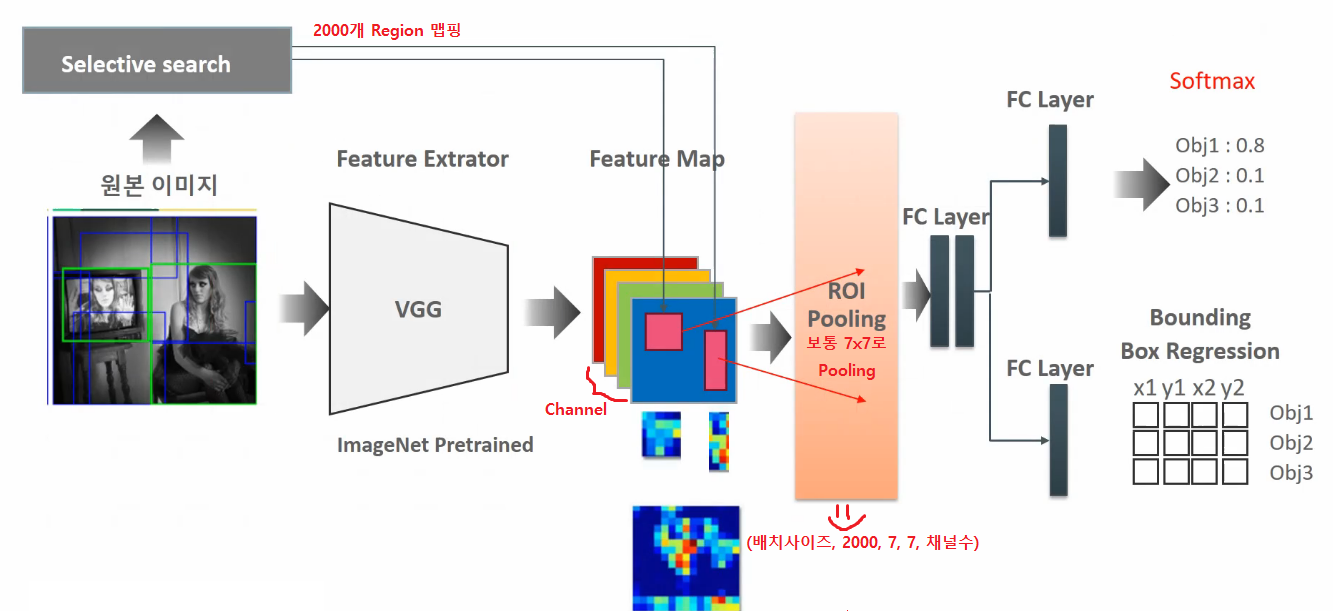

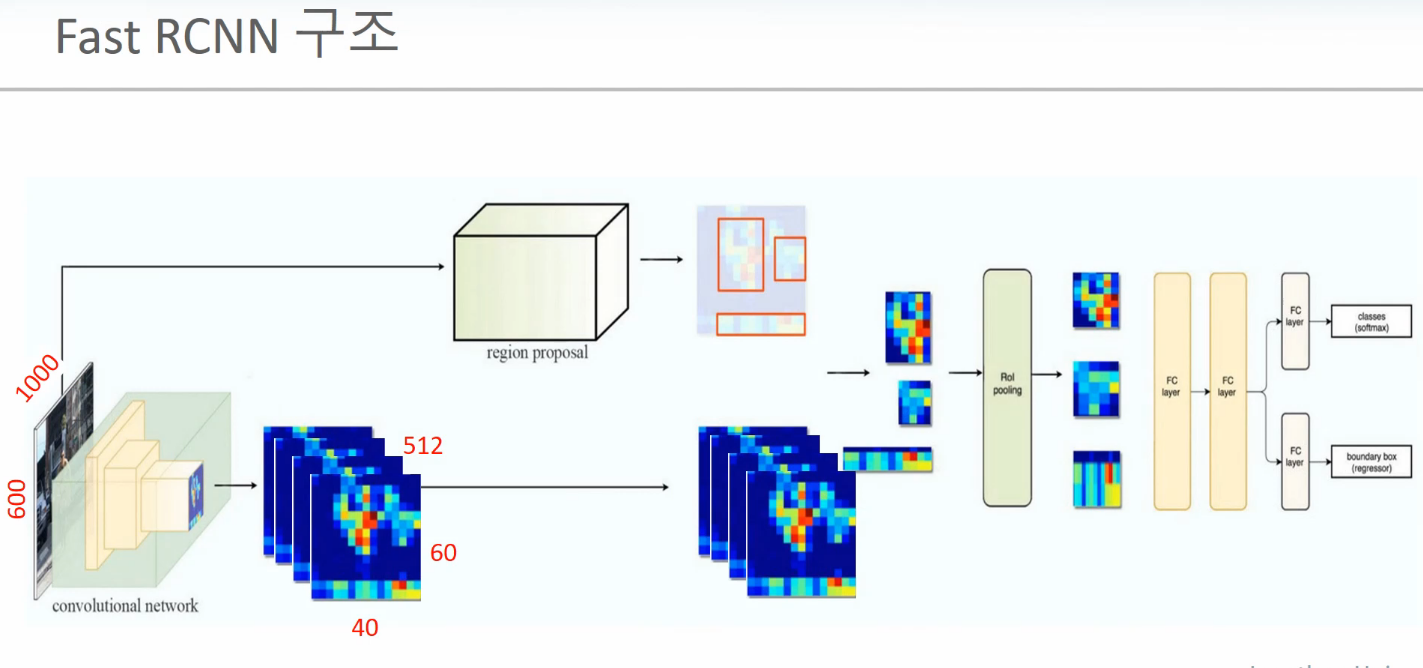

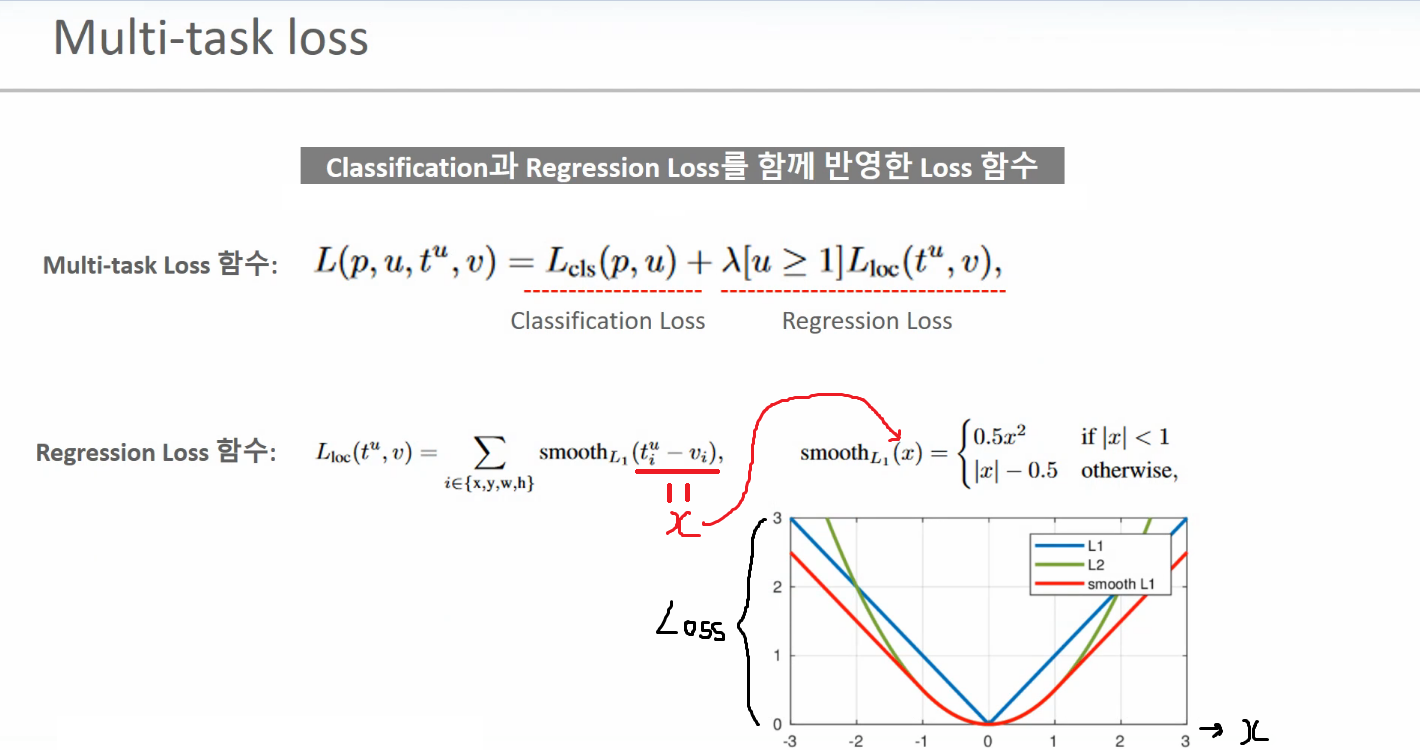

# **Faster RCNN**

* CPU에서 이루어지는 Fast RCNN의  Selective Search를 대신하여 Region Proposal Network(RPN)을 구성하여 전 과정을 딥러닝 네트워크 구조로 만듦
  * GPU 사용으로 빠른 학습 가능
  * End to End Network 학습 가능
  * Back Propagation이 RPN으로도 흘러 들어가 학습됨
* RPN이 Feature Map에서 Region Proposal을 진행함
* Anchor Box 개념이 적용됨
  * Feature Map의 각 픽셀에 총 9개의 Anchor Box가 맵핑되어 Object가 있을만한 곳을 학습

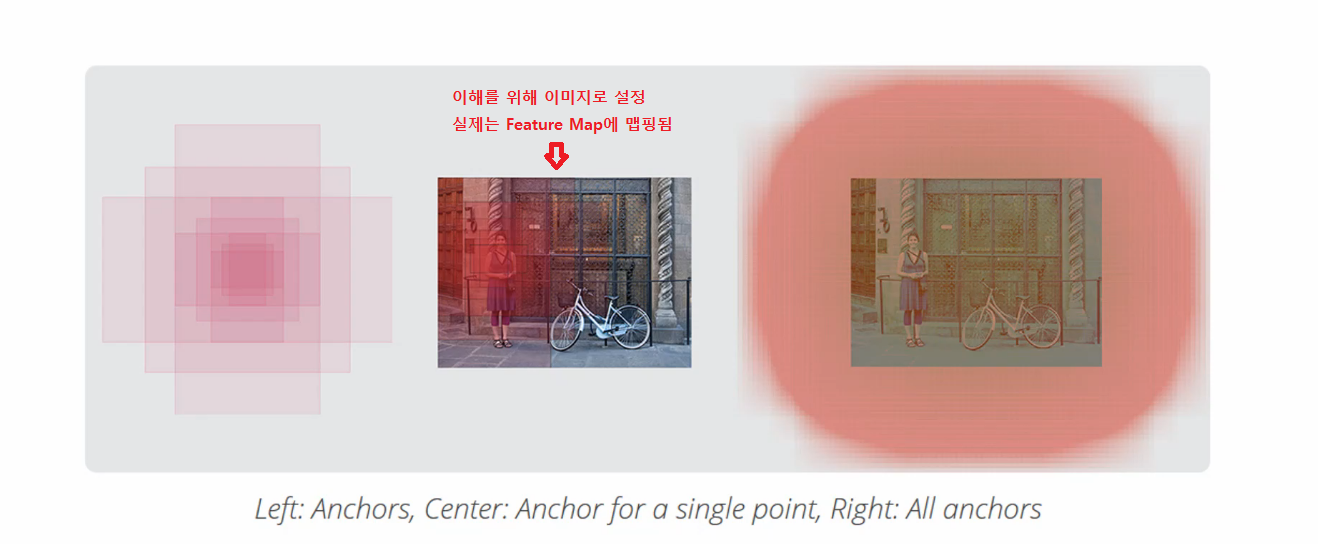

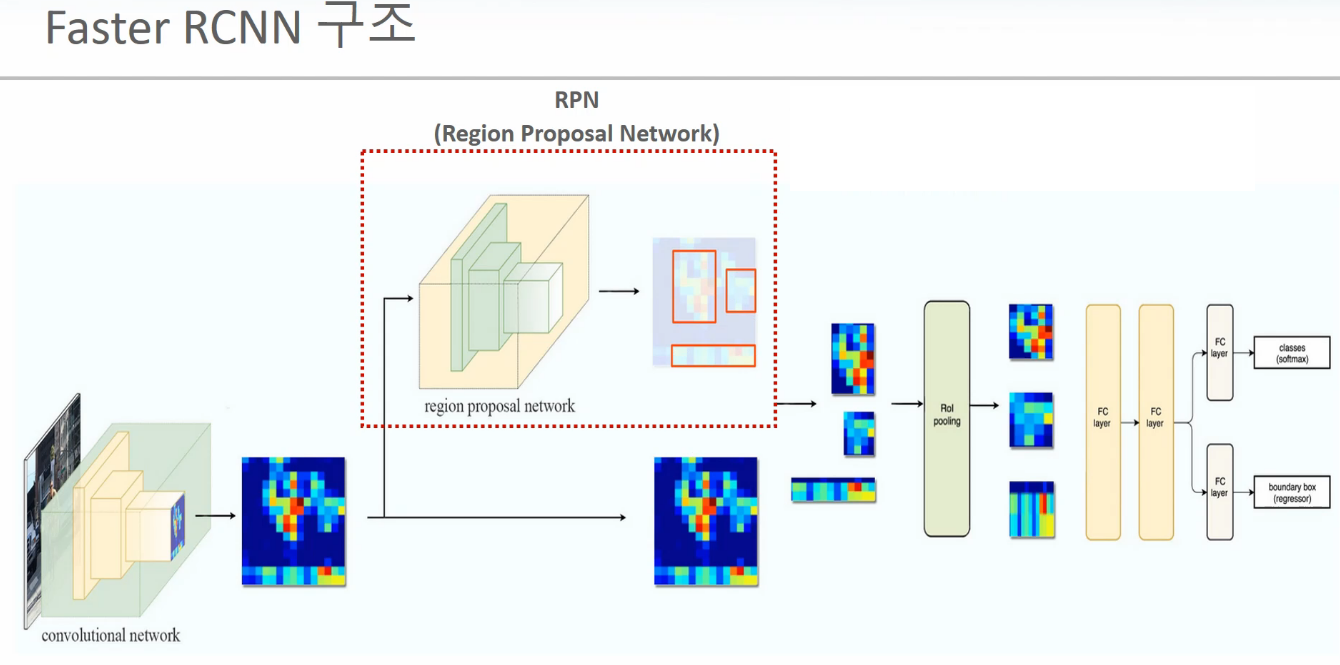

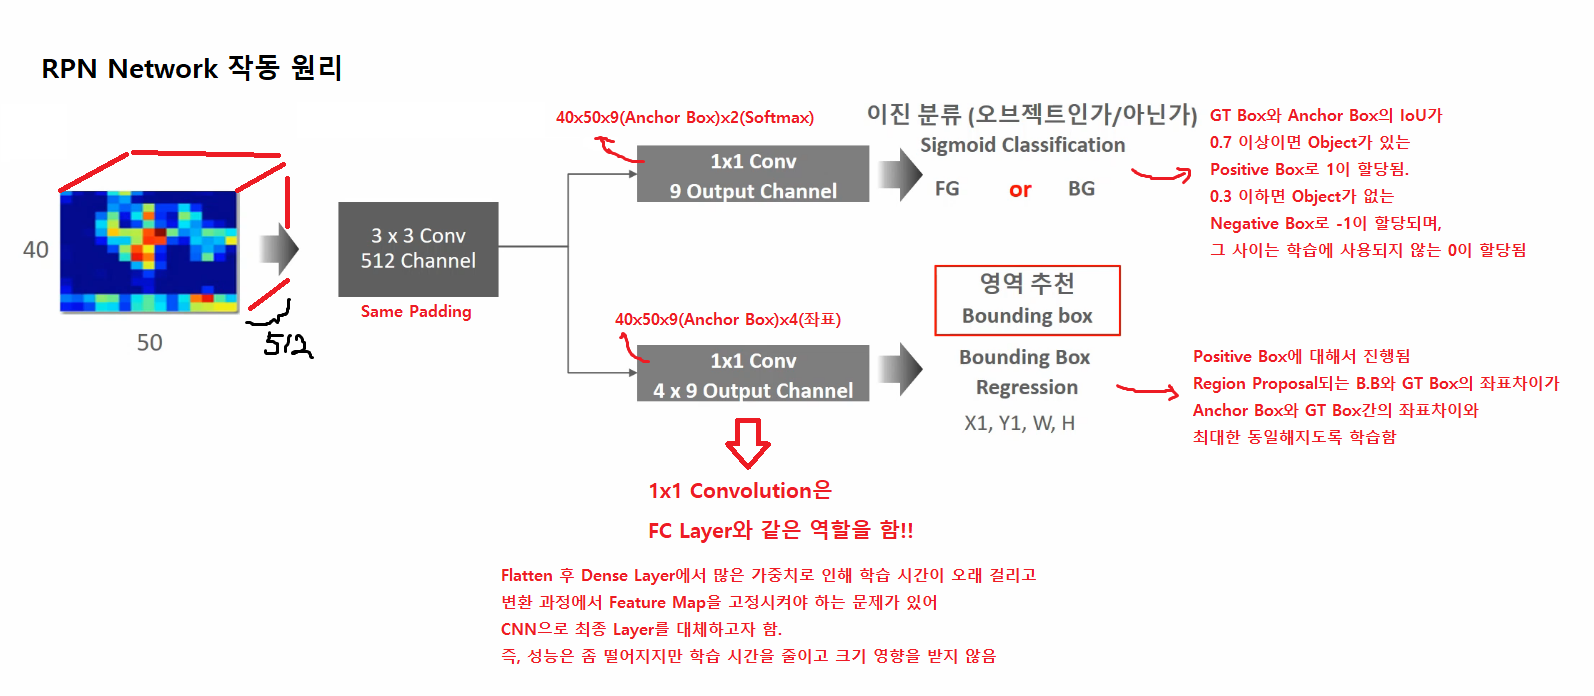

# **FPN을 활용한 Modern Faster RCNN 도 있음**
* 최근의 Modern한 모델들은 Backbone과 Head 사이에 FPN을 사용하는 Neck을 구성함
* 크기가 작으진 상위 피쳐맵의 추상화 된 정보와 이전의 하위 피쳐맵의 정보를 효과적으로 결합
* 즉, 다양한 피쳐맵의 정보들을 통해 작은 Object 들을 보다 잘 Detect할 수 있음

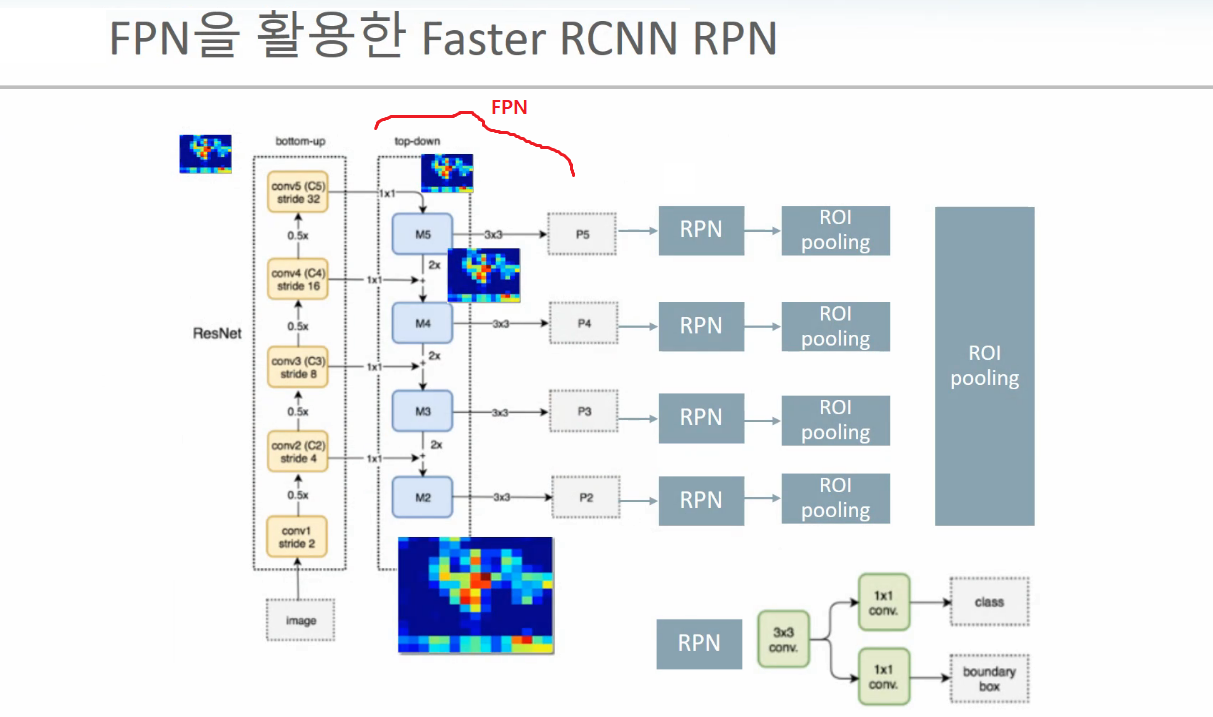